In [9]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Read data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# Data types
for col in df.columns:
    print(col, np.dtype(df[col]))

age int64
sex int64
cp int64
trestbps int64
chol int64
fbs int64
restecg int64
thalach int64
exang int64
oldpeak float64
slope int64
ca int64
thal int64
target int64


# Explore data

### Features histograms or KDEs 

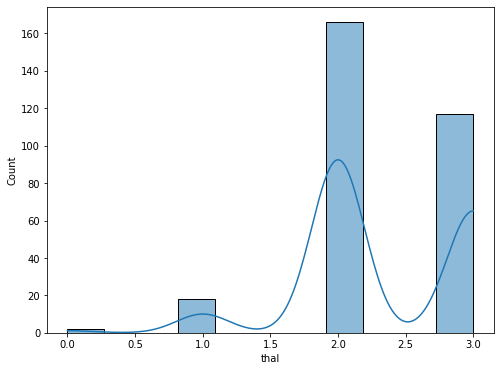

In [77]:
for feature in df.columns:
    if feature == 'target':
        continue
    plt.figure(figsize=(8,6))
    if df[feature].dtype == 'float':
        sns.kdeplot(data=df[feature], shade=True)
    elif df[feature].dtype == 'int':
        sns.histplot(data=df[feature], kde=True)
    #sns.histplot(data=df[feature], kde=True)

# Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [78]:
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.target = df.target

In [52]:
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


# Target-based compare of features

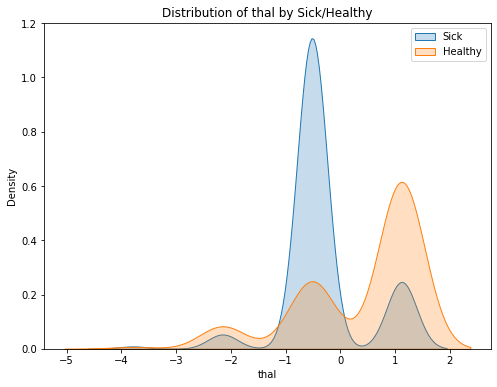

In [62]:
for feature in scaled_df.columns:
    if feature == 'target':
        continue
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=scaled_df[scaled_df.target == 1.0][feature], label="Sick", shade=True)
    sns.kdeplot(data=scaled_df[scaled_df.target == 0.0][feature], label="Healthy", shade=True)
    # Force legend to appear
    plt.legend()
    # Add title
    plt.title(f"Distribution of {feature} by Sick/Healthy")

    